# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:, 1:-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y.shape)

(10,)


## Feature Scaling

In [6]:
# y reshaped as 2D vertical array
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
# usually start with trying an rbf kernel first
regressor = SVR(kernel='rbf')

regressor.fit(X, y)

c:\Users\Bryan\Documents\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\.venv\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [12]:
# remember that model is trained on scaled input, so input to predict also 
# needs to be scaled!
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1))

# need to apply inverse_transform from sc_y that was used to scale output variable
# because the model will naturally produce scaled output


array([[170370.0204065]])

## Visualising the SVR results

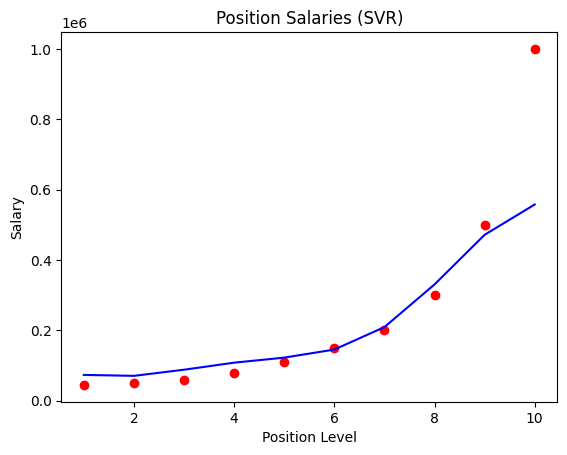

In [13]:
# Remember to apply inverse transform so axes are in original scales
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue' )
plt.title("Position Salaries (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)